In [1]:
#import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Dataset

file_path = r"D:\UNF\Term 2 - Summer 2025\CEN6940 -Computing Practicum\Project\Airfare dataset\Airfare dataset.csv"
df = pd.read_csv(file_path)

In [3]:
# Handle missing values

df.dropna(inplace=True)

In [4]:
# Label Encode Categorical Columns

categorical_cols = ['airline', 'flight_code', 'source_city', 'destinate_city',
                    'stop', 'Class', 'dep_time_category', 'arr_time_category']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
# Feature-Target Split
X = df.drop("price", axis=1)
y = df["price"]

In [6]:
# scale the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Multiple Linear Regression

# Define the results dictionary
results = {}

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Evaluation
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

# Store results
results["Linear Regression"] = {
    "RMSE": round(lr_rmse, 2),
    "MAE": round(lr_mae, 2),
    "R2 Score": round(lr_r2, 4)
}

In [9]:
# Random Forest Regression

rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

results["Random Forest"] = {
    "RMSE": round(rf_rmse, 2),
    "MAE": round(rf_mae, 2),
    "R2 Score": round(rf_r2, 4)
}

In [10]:
# Gradient Boosting Regression

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Evaluation
gb_rmse = mean_squared_error(y_test, gb_preds, squared=False)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_r2 = r2_score(y_test, gb_preds)

results["Gradient Boosting"] = {
    "RMSE": round(gb_rmse, 2),
    "MAE": round(gb_mae, 2),
    "R2 Score": round(gb_r2, 4)
}

In [13]:
# Neural Network (MLPRegressor)

import warnings
warnings.filterwarnings('ignore')


nn_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=100, early_stopping=True, random_state=42, verbose=True)
nn_model.fit(X_train, y_train)
nn_preds = nn_model.predict(X_test)

# Evaluation
nn_rmse = mean_squared_error(y_test, nn_preds, squared=False)
nn_mae = mean_absolute_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)

results["Neural Network"] = {
    "RMSE": round(nn_rmse, 2),
    "MAE": round(nn_mae, 2),
    "R2 Score": round(nn_r2, 4)
}


Iteration 1, loss = 336733439.79961926
Validation score: 0.596130
Iteration 2, loss = 45732369.68246964
Validation score: 0.897610
Iteration 3, loss = 24394609.67431111
Validation score: 0.910646
Iteration 4, loss = 21732678.52058025
Validation score: 0.920390
Iteration 5, loss = 19526876.52254892
Validation score: 0.927463
Iteration 6, loss = 18169979.47817674
Validation score: 0.931092
Iteration 7, loss = 17535465.34438824
Validation score: 0.932850
Iteration 8, loss = 17242249.43953702
Validation score: 0.933768
Iteration 9, loss = 17066860.99475575
Validation score: 0.934362
Iteration 10, loss = 16942492.93418975
Validation score: 0.934790
Iteration 11, loss = 16843167.88858410
Validation score: 0.935233
Iteration 12, loss = 16755723.96609258
Validation score: 0.935541
Iteration 13, loss = 16681189.98054840
Validation score: 0.935835
Iteration 14, loss = 16609457.73002852
Validation score: 0.936114
Iteration 15, loss = 16541209.02872318
Validation score: 0.936395
Iteration 16, loss

In [78]:
#  Table Format

performance_df = pd.DataFrame(results).T
print(performance_df)

                              RMSE     MAE  R2 Score
RF Grid Search             2209.39  830.37    0.9905
RF Random Search           2210.44  830.69    0.9905
Final Tuned Random Forest  2139.58  774.86    0.9911


In [16]:
# Find the best model (based on RMSE — lower is better)
best_model_name = min(results, key=lambda name: results[name]['RMSE'])

print("\n🏆 Best Model Based on RMSE:")
print(f"🔹 {best_model_name}")
print(f"  RMSE: {results[best_model_name]['RMSE']}")
print(f"  MAE: {results[best_model_name]['MAE']}")
print(f"  R2 Score: {results[best_model_name]['R2 Score']}")


🏆 Best Model Based on RMSE:
🔹 Random Forest
  RMSE: 2137.97
  MAE: 774.81
  R2 Score: 0.9911


In [17]:
# Map best model name to the actual trained model object

if best_model_name == "Linear Regression":
    best_model = lr_model
elif best_model_name == "Random Forest":
    best_model = rf_model
elif best_model_name == "Gradient Boosting":
    best_model = gb_model
elif best_model_name == "Neural Network":
    best_model = nn_model
else:
    raise ValueError("Unknown model selected.")

In [18]:
# Plot Performance Graphs

# Convert results dictionary to DataFrame
results_df = pd.DataFrame([
    {"Model": name, **metrics}
    for name, metrics in results.items()
])

In [19]:
# Set style

sns.set(style="whitegrid")

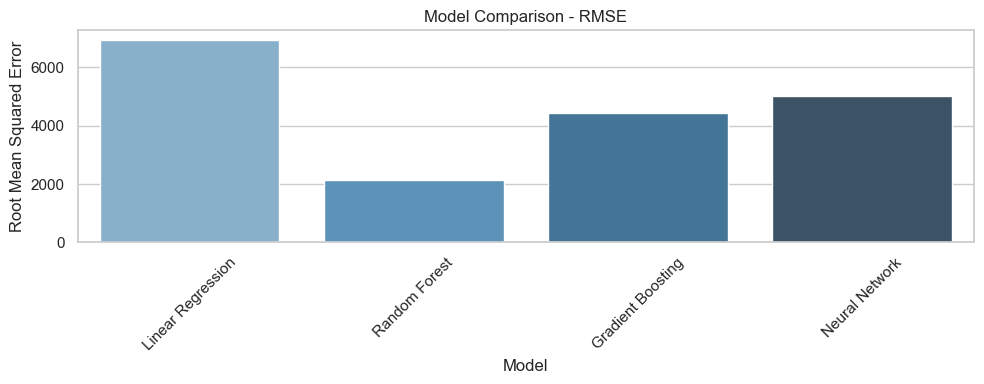

In [20]:
# Plot RMSE

plt.figure(figsize=(10, 4))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="Blues_d")
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

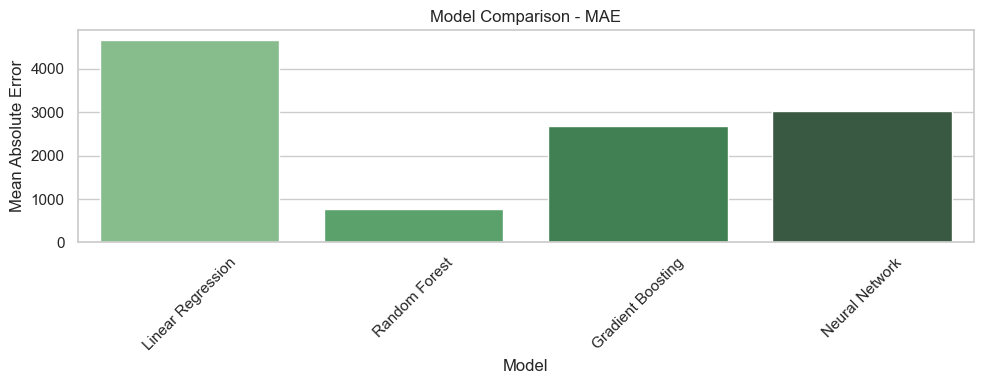

In [21]:
# Plot MAE

plt.figure(figsize=(10, 4))
sns.barplot(x="Model", y="MAE", data=results_df, palette="Greens_d")
plt.title("Model Comparison - MAE")
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

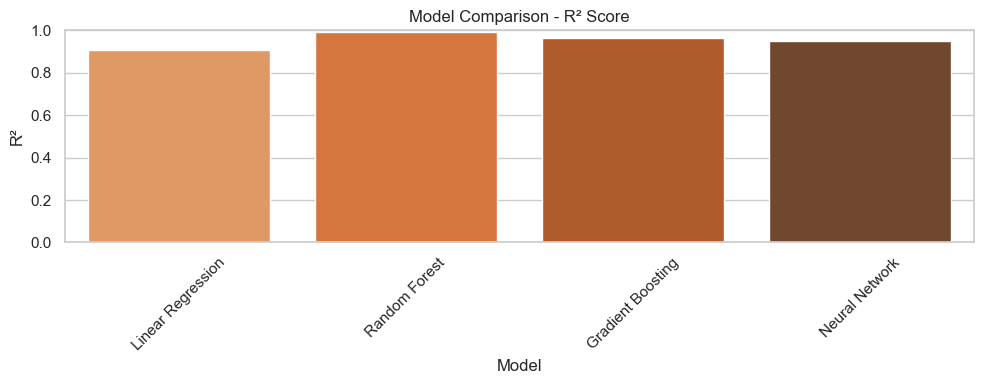

In [22]:
# Plot R² Score

plt.figure(figsize=(10, 4))
sns.barplot(x="Model", y="R2 Score", data=results_df, palette="Oranges_d")
plt.title("Model Comparison - R² Score")
plt.ylabel("R²")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

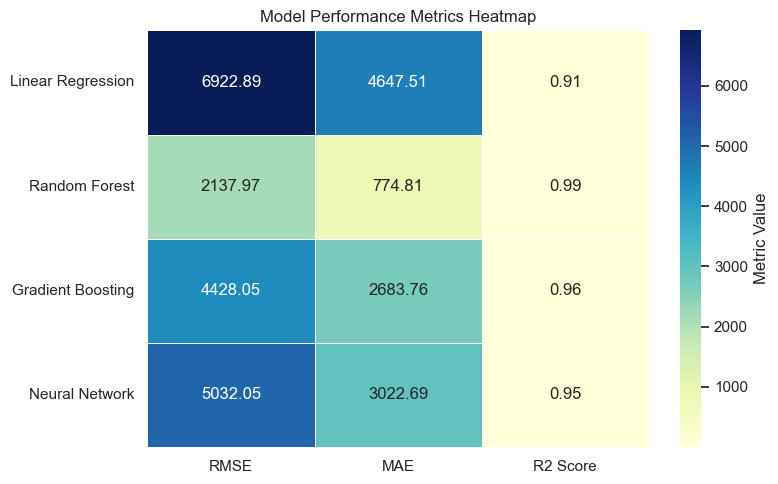

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# convert results to dataframes
performance_df = pd.DataFrame(results).T  # Transpose for models as rows
performance_df = performance_df[["RMSE", "MAE", "R2 Score"]] 

#  Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(performance_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "Metric Value"})
plt.title("Model Performance Metrics Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# Predict on test set

y_pred = best_model.predict(X_test)

# Create DataFrame with actual vs predicted

fare_comparison = pd.DataFrame({
    "Actual Fare": y_test.values,
    "Predicted Fare": y_pred
})

In [25]:
print(fare_comparison.head(10))

   Actual Fare  Predicted Fare
0         5823         5823.00
1         5939         6450.74
2         4111         4111.00
3         4348         4447.30
4        67809        67449.48
5         5177         5840.55
6         4111         4111.00
7         6489         6560.11
8         6311         6315.00
9        69713        69713.00


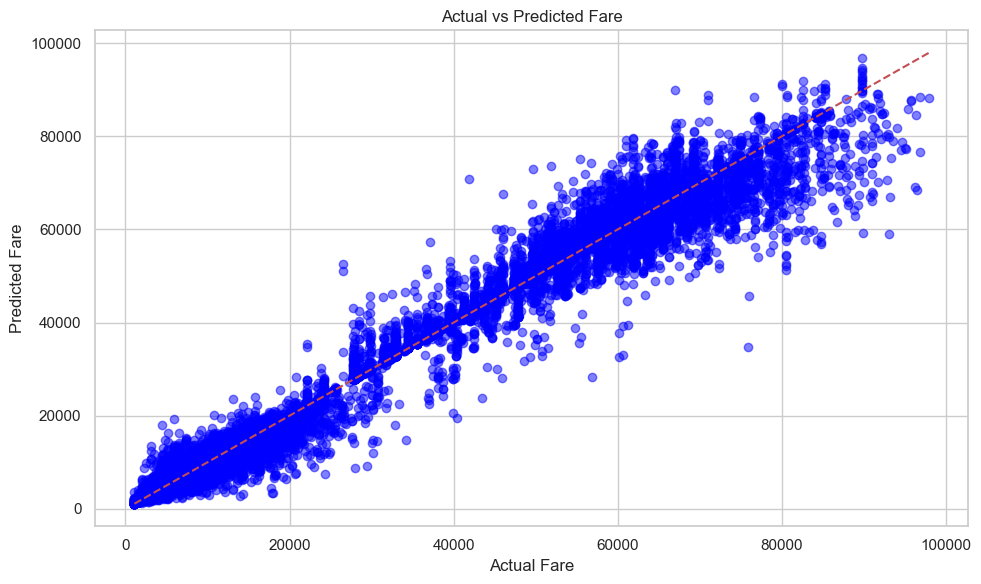

In [26]:
# Plot actual vs predicted

plt.figure(figsize=(10, 6))
plt.scatter(fare_comparison["Actual Fare"], fare_comparison["Predicted Fare"], alpha=0.5, color='blue')
plt.plot([fare_comparison["Actual Fare"].min(), fare_comparison["Actual Fare"].max()],
         [fare_comparison["Actual Fare"].min(), fare_comparison["Actual Fare"].max()],
         'r--')  # Diagonal line
plt.title("Actual vs Predicted Fare")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.grid(True)
plt.tight_layout()
plt.show()

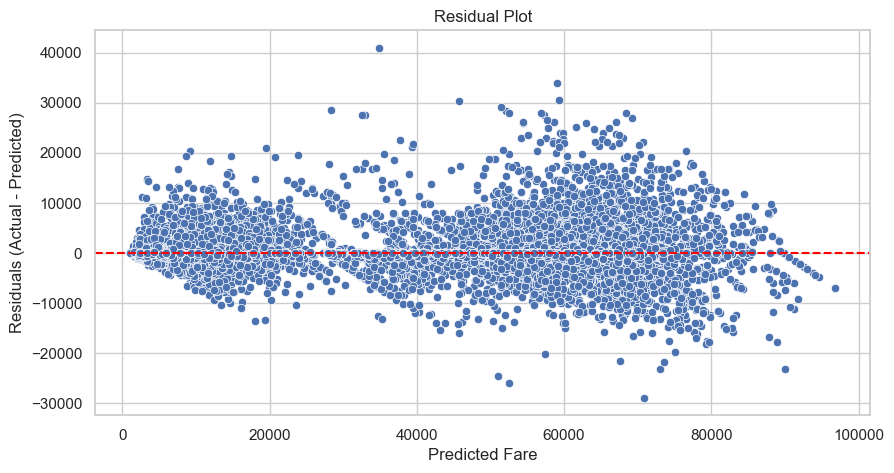

In [27]:
# Residual plot

residuals = y_test.values - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

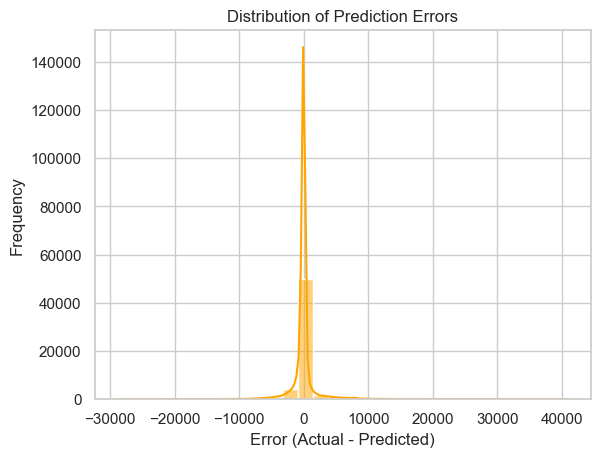

In [28]:
# histogram

sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

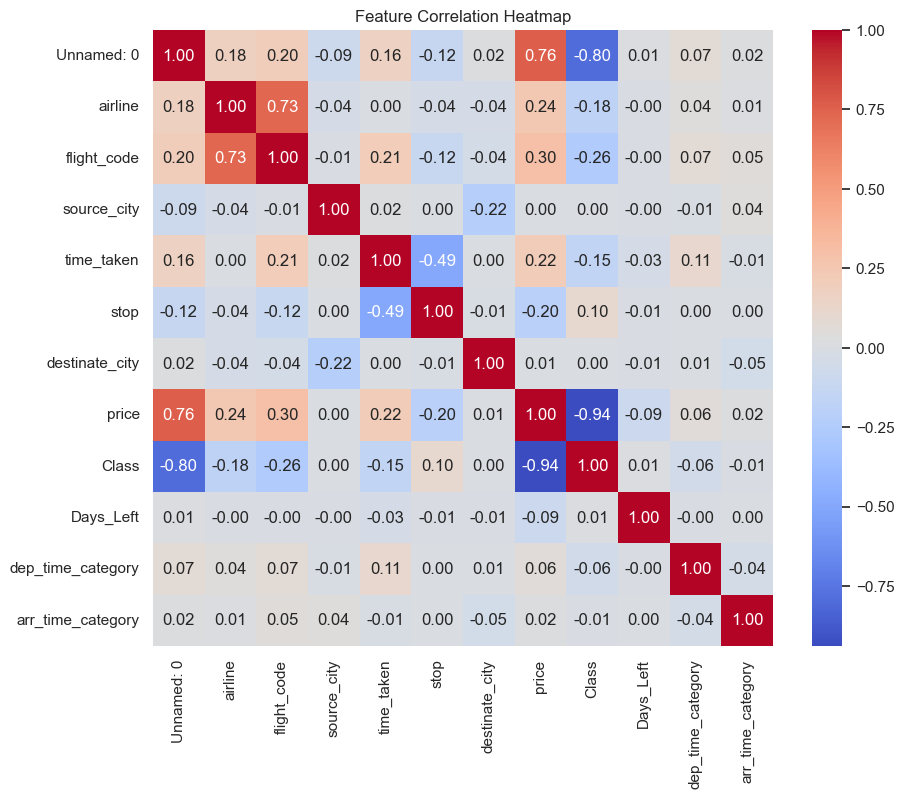

In [33]:


# Correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

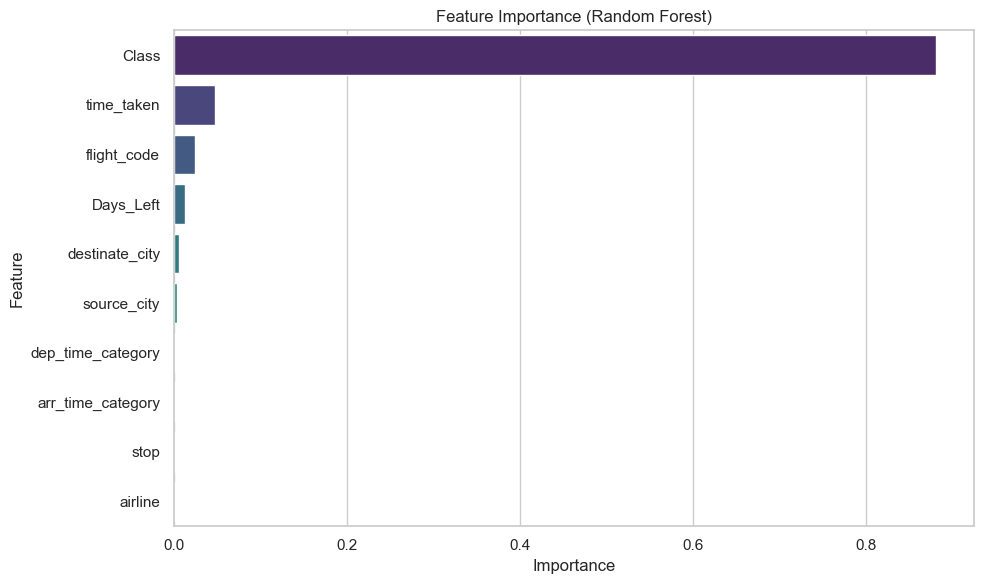

In [30]:
# Feature map

importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df[importance_df['Feature'] != 'Unnamed: 0'] 
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [147]:
# Predict for All Airlines (Fixed Input)

import joblib

# From Earlier Comparison best model is Random Forest 
joblib.dump(rf_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [148]:
# Build mapping from label encoders
def build_map(col):
    return {label: label_encoders[col].transform([label])[0] for label in label_encoders[col].classes_}

In [149]:
airline_map = build_map('airline')
flight_code_map = build_map('flight_code')
source_city_map = build_map('source_city')
destinate_city_map = build_map('destinate_city')
stop_map = build_map('stop')
class_map = build_map('Class')
dep_time_map = build_map('dep_time_category')
arr_time_map = build_map('arr_time_category')

In [150]:
# Define prediction function

def predict_fares_for_all_airlines(source_city, destination_city,
                                   time_taken=120, stop=None, travel_class=None,
                                   days_left=15, dep_time=None, arr_time=None):
    if source_city not in source_city_map or destination_city not in destinate_city_map:
        raise ValueError("Invalid source or destination city.")

    stop_val = stop_map.get(stop, list(stop_map.values())[0])
    class_val = class_map.get(travel_class, list(class_map.values())[0])
    dep_val = dep_time_map.get(dep_time, list(dep_time_map.values())[0])
    arr_val = arr_time_map.get(arr_time, list(arr_time_map.values())[0])
    flight_val = list(flight_code_map.values())[0]  # dummy flight code

    predicted_prices = {}

    for airline, airline_code in airline_map.items():
        input_dict = {
            "Unnamed: 0": 0,
            "airline": airline_code,
            "flight_code": flight_val,
            "source_city": source_city_map[source_city],
            "time_taken": time_taken,
            "stop": stop_val,
            "destinate_city": destinate_city_map[destination_city],
            "Class": class_val,
            "Days_Left": days_left,
            "dep_time_category": dep_val,
            "arr_time_category": arr_val
        }

        input_df = pd.DataFrame([input_dict])
        scaled_input = scaler.transform(input_df)
        predicted_fare = best_model.predict(scaled_input)[0]
        predicted_prices[airline] = int(predicted_fare)

    return pd.DataFrame(predicted_prices.items(), columns=["Airline", "Predicted Fare"]).sort_values("Predicted Fare")

In [154]:
# prediction using parameters

result = predict_fares_for_all_airlines(
    source_city='Delhi',
    destination_city='Bangalore',
    stop='1-stop',
    travel_class='Business',
    days_left=3,
    dep_time='Evening',
    arr_time='Night'
)
print(result)

     Airline  Predicted Fare
7    Vistara           17207
6     Trujet           17324
5    StarAir           17438
4   SpiceJet           17530
3     Indigo           17621
0  Air India           17659
2   GO FIRST           17702
1    AirAsia           17800


In [45]:
# Hypertuning using random search

from sklearn.model_selection import ParameterSampler, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
from tqdm import tqdm
import numpy as np

# Define search space
rf_param_dist = {
    'n_estimators': randint(80, 200),
    'max_depth': [10, 15, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Split manually for validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create 10 random hyperparameter combinations
param_list = list(ParameterSampler(rf_param_dist, n_iter=10, random_state=42))

best_score = float('inf')
best_model = None
all_scores = []

print("🔍 Tuning RandomForest with live progress:\n")

for params in tqdm(param_list, desc="Training RF models"):
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    
    all_scores.append((params, rmse))

    if rmse < best_score:
        best_score = rmse
        best_model = model
        best_params = params

# Results
print("\n✅ Best RMSE:", round(best_score, 2))
print("✅ Best Params:", best_params)

🔍 Tuning RandomForest with live progress:



Training RF models: 100%|█████████████████████████████████████████████████████████████| 10/10 [20:17<00:00, 121.79s/it]


✅ Best RMSE: 2147.94
✅ Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 155}


In [46]:
# Finding MAE and r2 score
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the validation set
preds = best_model.predict(X_val)

# Calculate MAE and R²
mae = mean_absolute_error(y_val, preds)
r2 = r2_score(y_val, preds)

print(f"MAE on validation set: {mae:.2f}")
print(f"R² on validation set: {r2:.4f}")

MAE on validation set: 817.48
R² on validation set: 0.9910


In [47]:
# Hypertuning using Grid search

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

param_grid = {
    'n_estimators': [80, 120, 160],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_list = list(ParameterGrid(param_grid))

best_score_grid = float('inf')
best_params_grid = None
best_model_grid = None
all_scores_grid = []

for params in tqdm(grid_list, desc="Grid Search"):
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)

    all_scores_grid.append((params, rmse))

    if rmse < best_score_grid:
        best_score_grid = rmse
        best_params_grid = params
        best_model_grid = model

print("\n✅ Grid Search Best RMSE:", round(best_score_grid, 2))
print("✅ Grid Search Best Params:", best_params_grid)

Grid Search: 100%|█████████████████████████████████████████████████████████████████████| 36/36 [57:01<00:00, 95.05s/it]


✅ Grid Search Best RMSE: 2146.85
✅ Grid Search Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}


In [49]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predictions on validation set using best model found
best_val_preds = best_model_grid.predict(X_val)

# Calculate MAE and R2 on validation data
mae_val = mean_absolute_error(y_val, best_val_preds)
r2_val = r2_score(y_val, best_val_preds)

print(f"MAE on validation set: {mae_val:.2f}")
print(f"R² on validation set: {r2_val:.4f}")

MAE on validation set: 817.10
R² on validation set: 0.9910


In [67]:
# Comparing best parametrs

print("Best Hyperparameters Comparison for Random Forest:\n")

print("Grid Search Best Parameters:")
for param, value in best_params_grid.items():
    print(f"  {param}: {value}")

print("\nRandomized Search Best Parameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

Best Hyperparameters Comparison for Random Forest:

Grid Search Best Parameters:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 160

Randomized Search Best Parameters:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 155


In [52]:
# Compare the results in test set

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(name, model):
    preds = model.predict(X_test)
    return {
        "RMSE": round(mean_squared_error(y_test, preds, squared=False), 2),
        "MAE": round(mean_absolute_error(y_test, preds), 2),
        "R2 Score": round(r2_score(y_test, preds), 4)
    }

results = {}
results["RF Grid Search"] = evaluate_model("RF Grid", best_model_grid)
results["RF Random Search"] = evaluate_model("RF Random", best_model)

for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")
    print()

Results for RF Grid Search:
  RMSE: 2209.39
  MAE: 830.37
  R2 Score: 0.9905

Results for RF Random Search:
  RMSE: 2210.44
  MAE: 830.69
  R2 Score: 0.9905



In [54]:
# Evaluation of hypertuning

def evaluate_model(name, model):
    preds = model.predict(X_test)
    return {
        "RMSE": round(mean_squared_error(y_test, preds, squared=False), 2),
        "MAE": round(mean_absolute_error(y_test, preds), 2),
        "R2 Score": round(r2_score(y_test, preds), 4)
    }

# List your models and names here:
models = {
    "RF Grid Search": best_model_grid,
    "RF Random Search": best_model,
    # add more models if you want
}

# Evaluate all models and collect results
results_list = []
for name, model in models.items():
    metrics = evaluate_model(name, model)
    metrics["Model"] = name
    results_list.append(metrics)

# Create DataFrame dynamically
results_df = pd.DataFrame(results_list)


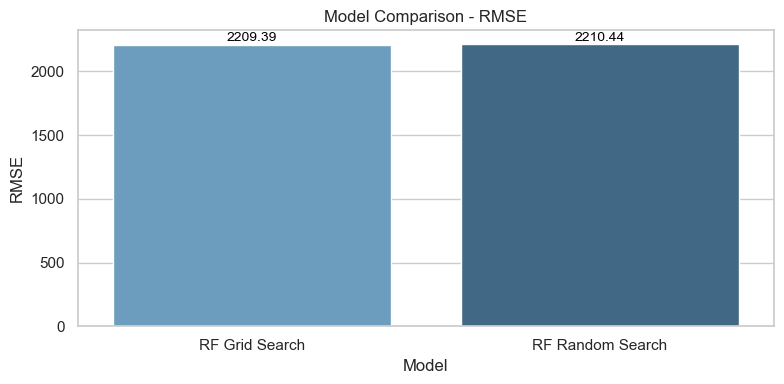

In [112]:
# Add labels in RMSE plot

def add_value_labels(ax, spacing=3):
 
    for p in ax.patches:
        height = p.get_height()
        # Format label to 2 decimals
        label = f'{height:.2f}'
        ax.text(
            p.get_x() + p.get_width() / 2,  # center of bar
            height + spacing,                # just above the bar
            label,
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
 
# RMSE plot

plt.figure(figsize=(8, 4))
ax = sns.barplot(x="Model", y="RMSE", data=results_df, palette="Blues_d")
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.xticks(rotation=0)
add_value_labels(ax)
plt.tight_layout()
plt.show()

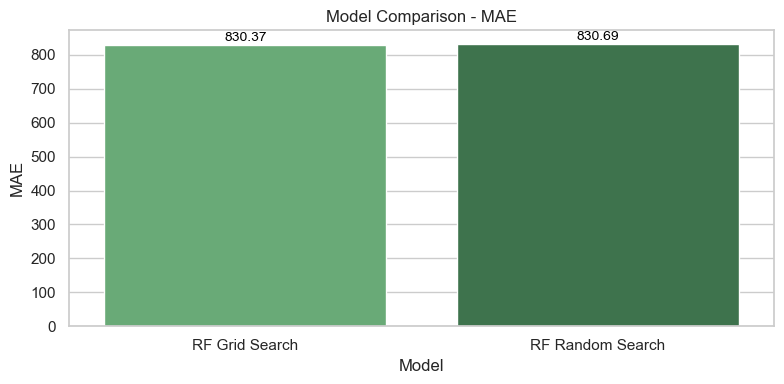

In [113]:
# Add labels in MAE plot

def add_value_labels(ax, spacing=3):
 
    for p in ax.patches:
        height = p.get_height()
        # Format label to 2 decimals
        label = f'{height:.2f}'
        ax.text(
            p.get_x() + p.get_width() / 2,  # center of bar
            height + spacing,                # just above the bar
            label,
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

# Similarly for MAE
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="Model", y="MAE", data=results_df, palette="Greens_d")
plt.title("Model Comparison - MAE")
plt.ylabel("MAE")
plt.xticks(rotation=0)
add_value_labels(ax)
plt.tight_layout()
plt.show()

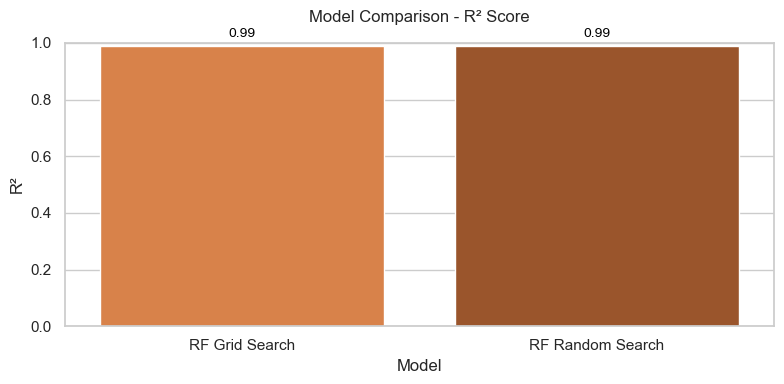

In [115]:
# Add labels in R2 plot

def add_value_labels(ax, spacing=.02):
 
    for p in ax.patches:
        height = p.get_height()
        # Format label to 2 decimals
        label = f'{height:.2f}'
        ax.text(
            p.get_x() + p.get_width() / 2,  # center of bar
            height + spacing,                # just above the bar
            label,
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

# And R2 Score
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="Model", y="R2 Score", data=results_df, palette="Oranges_d")
plt.title("Model Comparison - R² Score", pad =15)
plt.ylabel("R²")
plt.ylim(0, 1)
plt.xticks(rotation=0)
add_value_labels(ax)
plt.tight_layout()
plt.show()

In [68]:
# Final tuning of RF model from Grid Search parameters

final_rf_model = RandomForestRegressor(
    n_estimators=160,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Train on the full training set
final_rf_model.fit(X_train, y_train)

# Predict on test set
final_rf_preds = final_rf_model.predict(X_test)

# Evaluation
final_rf_rmse = mean_squared_error(y_test, final_rf_preds, squared=False)
final_rf_mae = mean_absolute_error(y_test, final_rf_preds)
final_rf_r2 = r2_score(y_test, final_rf_preds)

# Store results
results["Final Tuned Random Forest"] = {
    "RMSE": round(final_rf_rmse, 2),
    "MAE": round(final_rf_mae, 2),
    "R2 Score": round(final_rf_r2, 4)
}

# Print the results
print("✅ Final Tuned Random Forest Evaluation:")
for metric, value in results["Final Tuned Random Forest"].items():
    print(f"  {metric}: {value}")

✅ Final Tuned Random Forest Evaluation:
  RMSE: 2139.58
  MAE: 774.86
  R2 Score: 0.9911


In [76]:
# Cross validation on tuned data using 5 folds

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from tqdm import tqdm
import numpy as np

# Initialize KFold with 5 splits and shuffle data before splitting
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, val_idx in tqdm(kf.split(X_train), total=5, desc="Cross-Validation Progress"):
    # Indexing: X_train is numpy array, y_train is pandas Series
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Create model with best tuned params (example params from your grid search)
    model = RandomForestRegressor(
        n_estimators=160,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    )
    
    # Train and predict
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    
    # Evaluate
    fold_rmse = mean_squared_error(y_val, preds, squared=False)
    fold_mae = mean_absolute_error(y_val, preds)
    fold_r2 = r2_score(y_val, preds)
    
    rmse_scores.append(fold_rmse)
    mae_scores.append(fold_mae)
    r2_scores.append(fold_r2)

# Print mean ± std of metrics
print("\n✅ 5-Fold Cross Validation Results:")
print(f"RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"MAE:  {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"R²:   {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Cross-Validation Progress: 100%|█████████████████████████████████████████████████████████| 5/5 [02:01<00:00, 24.23s/it]


✅ 5-Fold Cross Validation Results:
RMSE: 2199.75 ± 31.86
MAE:  833.86 ± 8.45
R²:   0.9906 ± 0.0002


In [77]:
# Cross validation unsing 10 folds

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from tqdm import tqdm

# Initialize KFold with 10 splits and shuffle data before splitting
kf = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, val_idx in tqdm(kf.split(X_train), total=10, desc="10-Fold Cross-Validation Progress"):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]  # Assuming X_train is NumPy array
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]  # Assuming y_train is pandas Series
    
    model = RandomForestRegressor(
        n_estimators=160,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    
    rmse_scores.append(mean_squared_error(y_val, preds, squared=False))
    mae_scores.append(mean_absolute_error(y_val, preds))
    r2_scores.append(r2_score(y_val, preds))

print("\n✅ 10-Fold Cross Validation Results:")
print(f"RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"MAE:  {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"R²:   {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

10-Fold Cross-Validation Progress: 100%|███████████████████████████████████████████████| 10/10 [04:55<00:00, 29.58s/it]


✅ 10-Fold Cross Validation Results:
RMSE: 2153.34 ± 44.62
MAE:  803.04 ± 13.46
R²:   0.9910 ± 0.0003


In [79]:
# XGBoost model training

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize XGBoost Regressor with basic params
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)  #  default n_estimator value is 100. 

# Train on training data
xgb_model.fit(X_train, y_train)

# Predict on test data
xgb_preds = xgb_model.predict(X_test)

# Evaluate
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print("XGBoost Basic Model Performance:")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"MAE: {xgb_mae:.2f}")
print(f"R2 Score: {xgb_r2:.4f}")

XGBoost Basic Model Performance:
RMSE: 2815.74
MAE: 1583.05
R2 Score: 0.9845


In [81]:
# Randomized Search for XGBoost

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

xgb = XGBRegressor(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,          # Number of parameter settings sampled
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters from RandomizedSearchCV:")
print(random_search.best_params_)
print(f"Best RMSE (neg): {random_search.best_score_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from RandomizedSearchCV:
{'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best RMSE (neg): -2675.663284434163


In [82]:
# Use your best model from randomized search
best_xgb_model = random_search.best_estimator_

# Predict on the test data
y_pred = best_xgb_model.predict(X_test)

# Calculate MAE and R2
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

MAE: 1428.3478
R2 Score: 0.9863


In [84]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define model
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # optimize for RMSE
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit Grid Search on training data
grid_search.fit(X_train, y_train)

# Best model from grid search
best_xgb_grid = grid_search.best_estimator_

# Predict on test data
y_pred_grid = best_xgb_grid.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred_grid, squared=False)
mae = mean_absolute_error(y_test, y_pred_grid)
r2 = r2_score(y_test, y_pred_grid)

print(f"Best Grid Search Parameters: {grid_search.best_params_}")
print(f"Grid Search RMSE: {rmse:.4f}")
print(f"Grid Search MAE: {mae:.4f}")
print(f"Grid Search R2: {r2:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Grid Search Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Grid Search RMSE: 2545.5523
Grid Search MAE: 1388.1530
Grid Search R2: 0.9874


In [87]:
# 1. Normal training (basic XGBoost)
xgb_normal = XGBRegressor(random_state=42, n_jobs=-1)
xgb_normal.fit(X_train, y_train)
y_pred_normal = xgb_normal.predict(X_test)

rmse_normal = mean_squared_error(y_test, y_pred_normal, squared=False)
mae_normal = mean_absolute_error(y_test, y_pred_normal)
r2_normal = r2_score(y_test, y_pred_normal)

# 2. Randomized Search evaluation (use your randomized_search variable)
y_pred_random = random_search.predict(X_test)
rmse_random = mean_squared_error(y_test, y_pred_random, squared=False)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

# 3. Grid Search evaluation (assuming grid_search variable exists)
y_pred_grid = grid_search.predict(X_test)
rmse_grid = mean_squared_error(y_test, y_pred_grid, squared=False)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

# Create summary DataFrame
results_compare = pd.DataFrame({
    'Model': ['Normal Training', 'Randomized Search', 'Grid Search'],
    'RMSE': [rmse_normal, rmse_random, rmse_grid],
    'MAE': [mae_normal, mae_random, mae_grid],
    'R2 Score': [r2_normal, r2_random, r2_grid]
})

print(results_compare)

# Compare best parameters side-by-side for Randomized and Grid Search
params_compare = pd.DataFrame({
    'Randomized Search': pd.Series(random_search.best_params_),
    'Grid Search': pd.Series(grid_search.best_params_)
})

print("\nBest Hyperparameters Comparison:\n")
print(params_compare)

               Model         RMSE          MAE  R2 Score
0    Normal Training  2815.738561  1583.049609  0.984531
1  Randomized Search  2646.568987  1428.347817  0.986334
2        Grid Search  2545.552315  1388.153002  0.987357

Best Hyperparameters Comparison:

                  Randomized Search  Grid Search
colsample_bytree                0.8          1.0
learning_rate                   0.1          0.2
max_depth                       9.0          7.0
min_child_weight                5.0          NaN
n_estimators                  100.0        150.0
subsample                       0.6          0.8


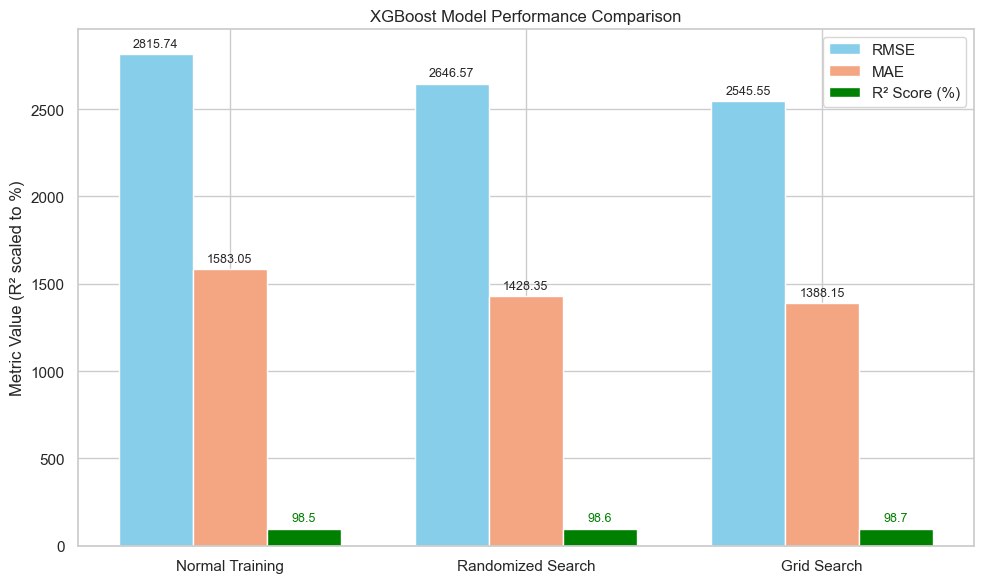

In [100]:
# XGBoost performance comparison plot

models = results_compare['Model'].values
rmse = results_compare['RMSE'].values
mae = results_compare['MAE'].values
r2_raw = results_compare['R2 Score'].values
r2_scaled = r2_raw * 100  # Scale R2 values for visualization

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars_rmse = ax.bar(x - width, rmse, width, label='RMSE', color='skyblue')
bars_mae = ax.bar(x, mae, width, label='MAE', color='#f4a582')
bars_r2 = ax.bar(x + width, r2_scaled, width, label='R² Score (%)', color='green')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel('Metric Value (R² scaled to %)')
ax.set_title('XGBoost Model Performance Comparison')
ax.legend()

# Annotate RMSE bars
for bar in bars_rmse:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Annotate MAE bars
for bar in bars_mae:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Annotate R2 bars (already scaled)
for i, bar in enumerate(bars_r2):
    height = bar.get_height()
    ax.annotate(f'{r2_scaled[i]:.1f}',  # Just the scaled value
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, color='green')

plt.tight_layout()
plt.show()

In [101]:
# Retrain the model using best parameters in XGBoost

# 1. Extract best parameters from grid search
best_params = grid_search.best_params_

# 2. Initialize XGBoost with best parameters
xgb_final = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42,
    n_jobs=-1
)

# 3. Fit the model on the full training data
xgb_final.fit(X_train, y_train)

# 4. Predict on test data
y_pred_final = xgb_final.predict(X_test)

# 5. Evaluate
final_rmse = mean_squared_error(y_test, y_pred_final, squared=False)
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

# 6. Print the final evaluation metrics
print("✅ Final XGBoost Model (Tuned with Grid Search):")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE:  {final_mae:.4f}")
print(f"R²:   {final_r2:.4f}")

✅ Final XGBoost Model (Tuned with Grid Search):
RMSE: 2545.5523
MAE:  1388.1530
R²:   0.9874


In [108]:
# 🔹 Best confirmed models from your pipeline
model_dict = {
    "Linear Regression": lr_model,
    "Gradient Boosting": gb_model,
    "Neural Network": nn_model,
    "RF (Grid Search)": final_rf_model,
    "XGBoost (Grid Search)": best_xgb_grid
}

# 🔹 Evaluate models on the test set
comparison_results = []
for name, model in model_dict.items():
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    comparison_results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R2 Score": round(r2, 4)
    })

# 🔹 Convert to DataFrame
compare_df = pd.DataFrame(comparison_results)

# 🔹 Print summary
print("\n📊 Final Model Comparison Table:")
print(compare_df)


📊 Final Model Comparison Table:
                   Model     RMSE      MAE  R2 Score
0      Linear Regression  6922.89  4647.51    0.9065
1      Gradient Boosting  4428.05  2683.76    0.9617
2         Neural Network  5032.05  3022.69    0.9506
3       RF (Grid Search)  2139.58   774.86    0.9911
4  XGBoost (Grid Search)  2545.55  1388.15    0.9874


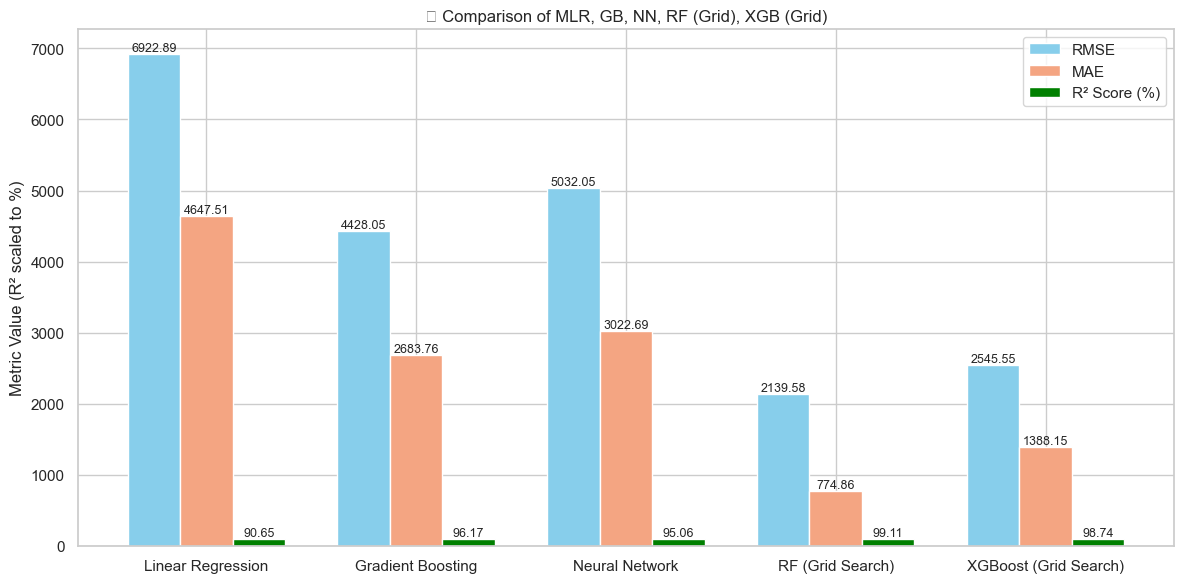

In [111]:
# 🔹 Bar chart for RMSE, MAE, R²
x = np.arange(len(compare_df))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

bars_rmse = ax.bar(x - width, compare_df["RMSE"], width, label='RMSE', color='skyblue')
bars_mae = ax.bar(x, compare_df["MAE"], width, label='MAE', color='#f4a582')
bars_r2 = ax.bar(x + width, compare_df["R2 Score"] * 100, width, label='R² Score (%)', color='green')

ax.set_xticks(x)
ax.set_xticklabels(compare_df["Model"], rotation=0)
ax.set_ylabel('Metric Value (R² scaled to %)')
ax.set_title('📈 Comparison of MLR, GB, NN, RF (Grid), XGB (Grid)')
ax.legend()

# 🔹 Annotate bars
def annotate(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height + 1),
                    ha='center', va='bottom', fontsize=9)

annotate(bars_rmse)
annotate(bars_mae)
annotate(bars_r2)

plt.tight_layout()
plt.show()

In [116]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

stack = StackingRegressor(
    estimators=[
        ('rf', final_rf_model),
        ('xgb', best_xgb_grid)
    ],
    final_estimator=Ridge()
)

stack.fit(X_train, y_train)
stack_preds = stack.predict(X_test)

results["Stacking Ensemble (RF + XGB)"] = {
    "RMSE": round(mean_squared_error(y_test, stack_preds, squared=False), 2),
    "MAE": round(mean_absolute_error(y_test, stack_preds), 2),
    "R2 Score": round(r2_score(y_test, stack_preds), 4)
}

In [118]:
print("✅ Stacking Ensemble Evaluation:")
print(results["Stacking Ensemble (RF + XGB)"])

✅ Stacking Ensemble Evaluation:
{'RMSE': 2123.97, 'MAE': 858.46, 'R2 Score': 0.9912}


In [119]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

# Define the neural network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

stack = StackingRegressor(
    estimators=[
        ('rf', final_rf_model),
        ('xgb', best_xgb_grid),
        ('nn', nn_model)
    ],
    final_estimator=Ridge()
)

stack.fit(X_train, y_train)
stack_preds = stack.predict(X_test)

results["Stacking Ensemble (RF + XGB + NN)"] = {
    "RMSE": round(mean_squared_error(y_test, stack_preds, squared=False), 2),
    "MAE": round(mean_absolute_error(y_test, stack_preds), 2),
    "R2 Score": round(r2_score(y_test, stack_preds), 4)
}



✅ Stacking Ensemble Evaluation:
{'RMSE': 2123.97, 'MAE': 858.46, 'R2 Score': 0.9912}


In [120]:
print("✅ Stacking Ensemble Evaluation:")
print(results["Stacking Ensemble (RF + XGB + NN)"])

✅ Stacking Ensemble Evaluation:
{'RMSE': 2122.81, 'MAE': 869.11, 'R2 Score': 0.9912}


In [132]:
# 🔹 Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Step 2: Define and Train NN (same architecture)
nn_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    max_iter=100,
    early_stopping=True,
    random_state=42,
    verbose=True  # Show progress
)
nn_model.fit(X_train_scaled, y_train)

# 🔹 Step 3: Predict & Evaluate
nn_preds = nn_model.predict(X_test_scaled)

nn_rmse = mean_squared_error(y_test, nn_preds, squared=False)
nn_mae = mean_absolute_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)

# 🔹 Step 4: Store results
results["Neural Network"] = {
    "RMSE": round(nn_rmse, 2),
    "MAE": round(nn_mae, 2),
    "R2 Score": round(nn_r2, 4)
}

Iteration 1, loss = 336779691.61136329
Validation score: 0.595965
Iteration 2, loss = 45735020.54415078
Validation score: 0.897639
Iteration 3, loss = 24388468.56763055
Validation score: 0.910664
Iteration 4, loss = 21728887.46085706
Validation score: 0.920399
Iteration 5, loss = 19525307.82831868
Validation score: 0.927465
Iteration 6, loss = 18169854.37787846
Validation score: 0.931091
Iteration 7, loss = 17535809.02231257
Validation score: 0.932848
Iteration 8, loss = 17243011.12062863
Validation score: 0.933764
Iteration 9, loss = 17068534.16201573
Validation score: 0.934354
Iteration 10, loss = 16944580.65094978
Validation score: 0.934783
Iteration 11, loss = 16845059.84844099
Validation score: 0.935227
Iteration 12, loss = 16757013.55495306
Validation score: 0.935537
Iteration 13, loss = 16682085.26117141
Validation score: 0.935830
Iteration 14, loss = 16610977.60975464
Validation score: 0.936104
Iteration 15, loss = 16545138.14232766
Validation score: 0.936370
Iteration 16, loss

In [133]:
# 🔹 Compare results of all 6 models

model_dict = {
    "Linear Regression": lr_model,
    "Gradient Boosting": gb_model,
    "Neural Network": nn_model,
    "RF (Grid Search)": final_rf_model,
    "XGBoost (Grid Search)": best_xgb_grid,
    "Stacking Ensemble (RF + XGB + NN)": stack
}

# 🔹 Evaluate models on the test set
comparison_results = []
for name, model in model_dict.items():
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    comparison_results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R2 Score": round(r2, 4)
    })

# 🔹 Convert to DataFrame
compare_df = pd.DataFrame(comparison_results)

# 🔹 Print summary
print("\n📊 Final Model Comparison Table:")
print(compare_df)


📊 Final Model Comparison Table:
                               Model     RMSE      MAE  R2 Score
0                  Linear Regression  6922.89  4647.51    0.9065
1                  Gradient Boosting  4428.05  2683.76    0.9617
2                     Neural Network  5070.96  3064.37    0.9498
3                   RF (Grid Search)  2139.58   774.86    0.9911
4              XGBoost (Grid Search)  2545.55  1388.15    0.9874
5  Stacking Ensemble (RF + XGB + NN)  2122.81   869.11    0.9912


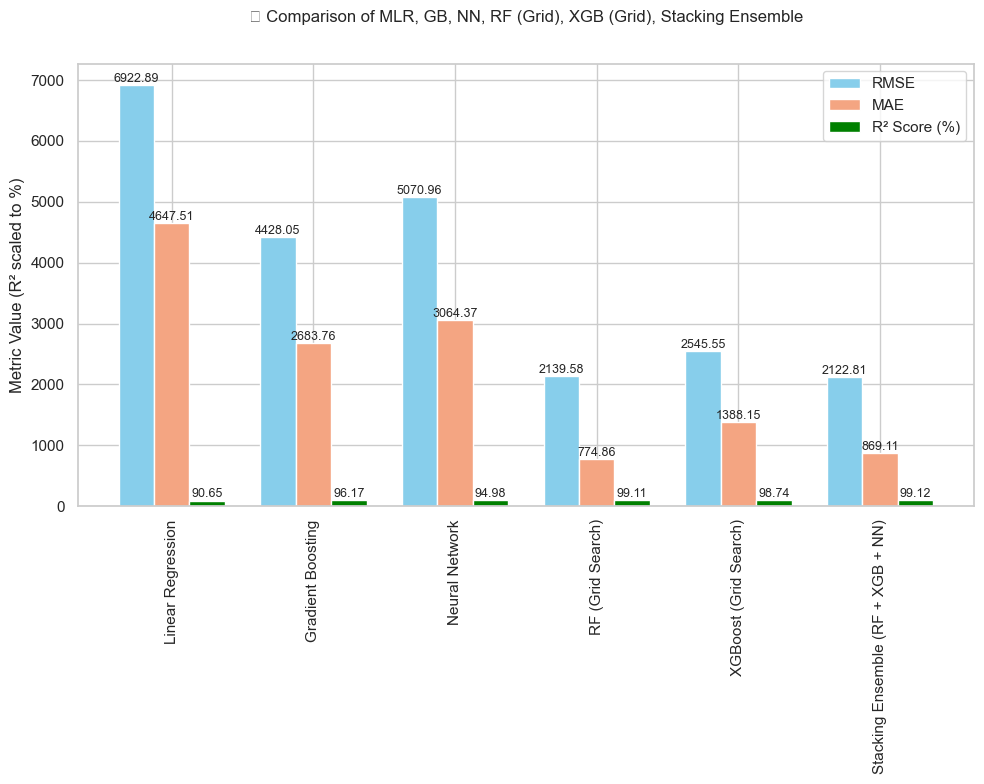

In [131]:
# 🔹 Bar chart for RMSE, MAE, R²
x = np.arange(len(compare_df))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 8))

bars_rmse = ax.bar(x - width, compare_df["RMSE"], width, label='RMSE', color='skyblue')
bars_mae = ax.bar(x, compare_df["MAE"], width, label='MAE', color='#f4a582')
bars_r2 = ax.bar(x + width, compare_df["R2 Score"] * 100, width, label='R² Score (%)', color='green')

ax.set_xticks(x)
ax.set_xticklabels(compare_df["Model"], rotation=90)
ax.set_ylabel('Metric Value (R² scaled to %)')
ax.set_title('📈 Comparison of MLR, GB, NN, RF (Grid), XGB (Grid), Stacking Ensemble',pad=30)
ax.legend()

# 🔹 Annotate bars
def annotate(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height + 1),
                    ha='center', va='bottom', fontsize=9)

annotate(bars_rmse)
annotate(bars_mae)
annotate(bars_r2)

plt.tight_layout()
plt.show()

In [134]:
import joblib

# Save stacking model
joblib.dump(stack, 'best_model.pkl')

# (Optional) Re-save encoders & scaler if not already done
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [135]:
import joblib

# Load saved stacking model and preprocessing tools
best_model = joblib.load('best_model.pkl')  # This now points to your stacking model
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')

In [136]:
def build_map(col):
    return {label: label_encoders[col].transform([label])[0] for label in label_encoders[col].classes_}

airline_map = build_map('airline')
flight_code_map = build_map('flight_code')
source_city_map = build_map('source_city')
destinate_city_map = build_map('destinate_city')
stop_map = build_map('stop')
class_map = build_map('Class')
dep_time_map = build_map('dep_time_category')
arr_time_map = build_map('arr_time_category')

In [137]:
def predict_fares_for_all_airlines(source_city, destination_city,
                                   time_taken=120, stop=None, travel_class=None,
                                   days_left=15, dep_time=None, arr_time=None):
    if source_city not in source_city_map or destination_city not in destinate_city_map:
        raise ValueError("Invalid source or destination city.")

    stop_val = stop_map.get(stop, list(stop_map.values())[0])
    class_val = class_map.get(travel_class, list(class_map.values())[0])
    dep_val = dep_time_map.get(dep_time, list(dep_time_map.values())[0])
    arr_val = arr_time_map.get(arr_time, list(arr_time_map.values())[0])
    flight_val = list(flight_code_map.values())[0]  # dummy flight code

    predicted_prices = {}

    for airline, airline_code in airline_map.items():
        input_dict = {
            "Unnamed: 0": 0,
            "airline": airline_code,
            "flight_code": flight_val,
            "source_city": source_city_map[source_city],
            "time_taken": time_taken,
            "stop": stop_val,
            "destinate_city": destinate_city_map[destination_city],
            "Class": class_val,
            "Days_Left": days_left,
            "dep_time_category": dep_val,
            "arr_time_category": arr_val
        }

        input_df = pd.DataFrame([input_dict])
        scaled_input = scaler.transform(input_df)
        predicted_fare = best_model.predict(scaled_input)[0]
        predicted_prices[airline] = int(predicted_fare)

    return pd.DataFrame(predicted_prices.items(), columns=["Airline", "Predicted Fare"]).sort_values("Predicted Fare")

In [155]:
result = predict_fares_for_all_airlines(
    source_city='Bangalore',
    destination_city='Mumbai',
    stop='2+-stop',
    travel_class='Economy',
    days_left=3,
    dep_time='Evening',
    arr_time='Night'
)
print(result)

     Airline  Predicted Fare
7    Vistara            8236
0  Air India            8266
6     Trujet            8357
5    StarAir            8462
4   SpiceJet            8533
3     Indigo            8604
2   GO FIRST            8675
1    AirAsia            8681
